In [2]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [3]:
data = pd.read_csv("D:\PRASUNET-02-TASK\DATA\Titanic datasets.csv")

In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [17]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [19]:
f1 = encoder.fit_transform(data[["Sex","Embarked"]])

In [20]:
f2 = pd.DataFrame(f1,columns=encoder.get_feature_names_out())

In [21]:
f2

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
413,0.0,1.0,0.0,0.0,1.0
414,1.0,0.0,1.0,0.0,0.0
415,0.0,1.0,0.0,0.0,1.0
416,0.0,1.0,0.0,0.0,1.0


In [23]:
data2 = pd.concat([data,f2],axis=1)

In [25]:
data2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0,1.0,0.0,1.0,0.0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1.0,0.0,0.0,0.0,1.0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0,1.0,0.0,1.0,0.0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0,1.0,0.0,0.0,1.0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1.0,0.0,0.0,0.0,1.0


In [27]:
data2["Cabin"].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [28]:
data2.drop(columns=["Sex","Embarked","Ticket","Cabin","Name"],inplace=True)

In [29]:
data2

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,0,3,34.5,0,0,7.8292,0.0,1.0,0.0,1.0,0.0
1,893,1,3,47.0,1,0,7.0000,1.0,0.0,0.0,0.0,1.0
2,894,0,2,62.0,0,0,9.6875,0.0,1.0,0.0,1.0,0.0
3,895,0,3,27.0,0,0,8.6625,0.0,1.0,0.0,0.0,1.0
4,896,1,3,22.0,1,1,12.2875,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,NaN,0,0,8.0500,0.0,1.0,0.0,0.0,1.0
414,1306,1,1,39.0,0,0,108.9000,1.0,0.0,1.0,0.0,0.0
415,1307,0,3,38.5,0,0,7.2500,0.0,1.0,0.0,0.0,1.0
416,1308,0,3,NaN,0,0,8.0500,0.0,1.0,0.0,0.0,1.0


In [30]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Sex_female   418 non-null    float64
 8   Sex_male     418 non-null    float64
 9   Embarked_C   418 non-null    float64
 10  Embarked_Q   418 non-null    float64
 11  Embarked_S   418 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 39.3 KB


In [37]:
data2.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Age            86
SibSp           0
Parch           0
Fare            1
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

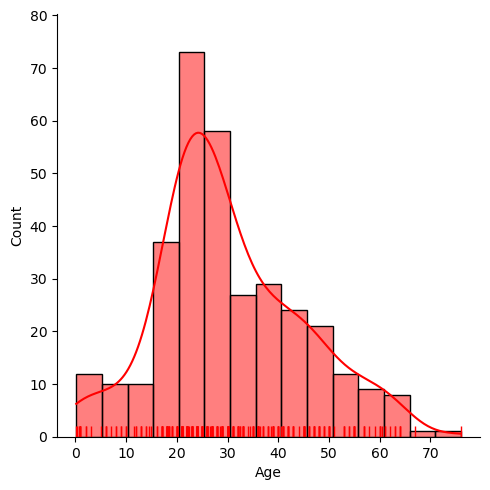

In [36]:
sns.displot(data2["Age"],kde=True,rug=True,color="r")
plt.show()

## So our feature(Age) is Normaly distributed So that I replace all null values into Mean OK!

In [39]:
mean = data2["Age"].mean()

In [40]:
mean

30.272590361445783

In [41]:
data2["Age"] = data2["Age"].fillna(mean)

In [44]:
data2.dropna(axis=0,inplace=True)

In [45]:
data2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [46]:
data2.duplicated().sum()

0

In [47]:
list(data2.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [48]:
data2.shape

(417, 12)

In [49]:
data2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,1100.635492,0.364508,2.263789,30.200103,0.448441,0.393285,35.627188,0.364508,0.635492,0.244604,0.110312,0.645084
std,120.923774,0.481870,0.842077,12.562386,0.897568,0.982419,55.907576,0.481870,0.481870,0.430369,0.313654,0.479063
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.000000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1101.000000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1205.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.500000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
data2

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,0,3,34.50000,0,0,7.8292,0.0,1.0,0.0,1.0,0.0
1,893,1,3,47.00000,1,0,7.0000,1.0,0.0,0.0,0.0,1.0
2,894,0,2,62.00000,0,0,9.6875,0.0,1.0,0.0,1.0,0.0
3,895,0,3,27.00000,0,0,8.6625,0.0,1.0,0.0,0.0,1.0
4,896,1,3,22.00000,1,1,12.2875,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,30.27259,0,0,8.0500,0.0,1.0,0.0,0.0,1.0
414,1306,1,1,39.00000,0,0,108.9000,1.0,0.0,1.0,0.0,0.0
415,1307,0,3,38.50000,0,0,7.2500,0.0,1.0,0.0,0.0,1.0
416,1308,0,3,30.27259,0,0,8.0500,0.0,1.0,0.0,0.0,1.0


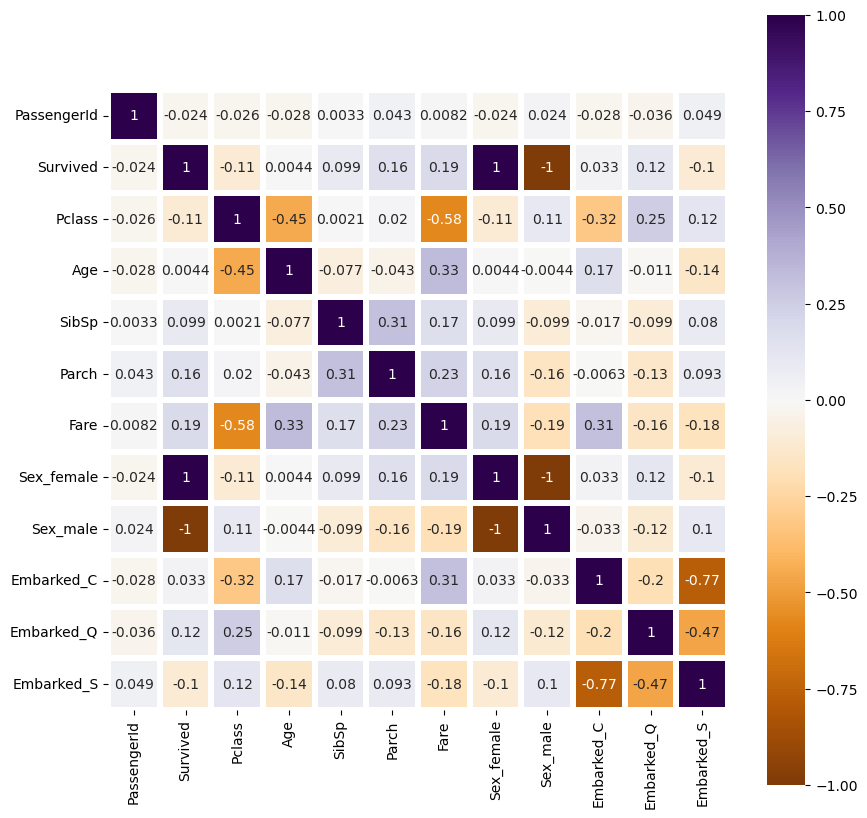

In [65]:
plt.figure(figsize=(10,10))

corr = data2[["PassengerId","Survived","Pclass","Age","SibSp","Parch","Fare","Sex_female","Sex_male","Embarked_C","Embarked_Q","Embarked_S"]].corr()
sns.heatmap(corr,annot=True,cmap="PuOr",linewidths=4,square=True,center=0)
plt.show()

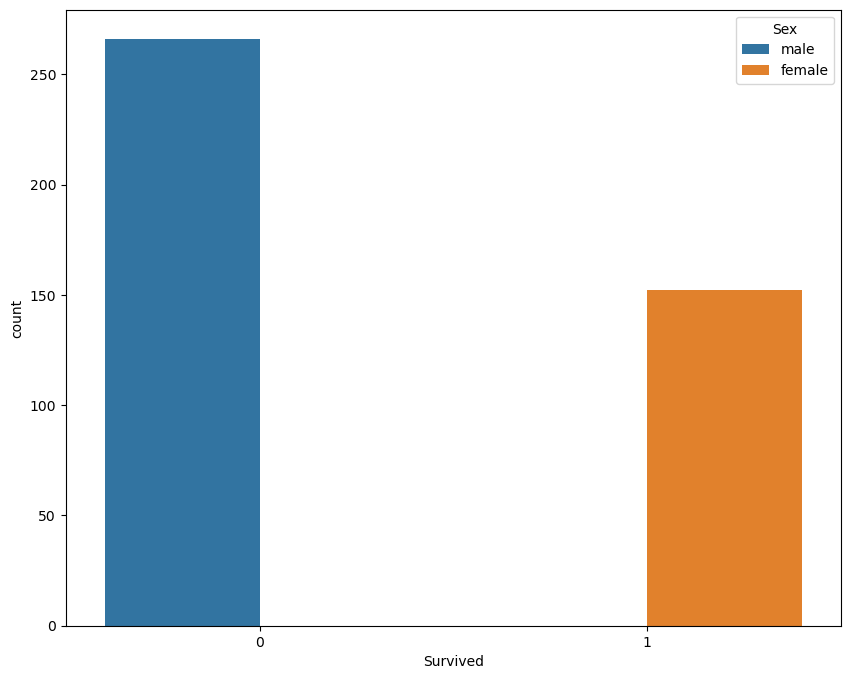

In [78]:
plt.figure(figsize=(10,8))
sns.countplot(x="Survived",data=data,hue="Sex")
plt.show()

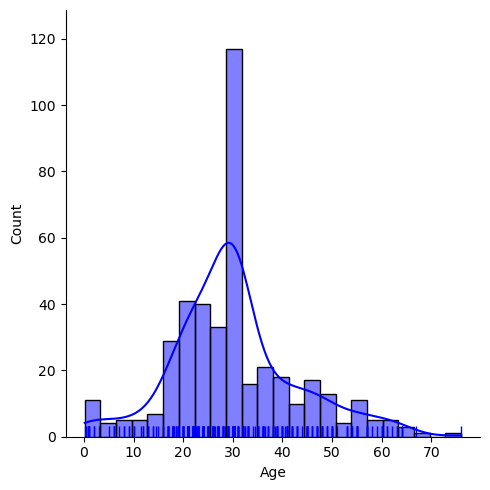

In [89]:

sns.displot(data2["Age"],rug=True,kde=True,color="b")
plt.show()

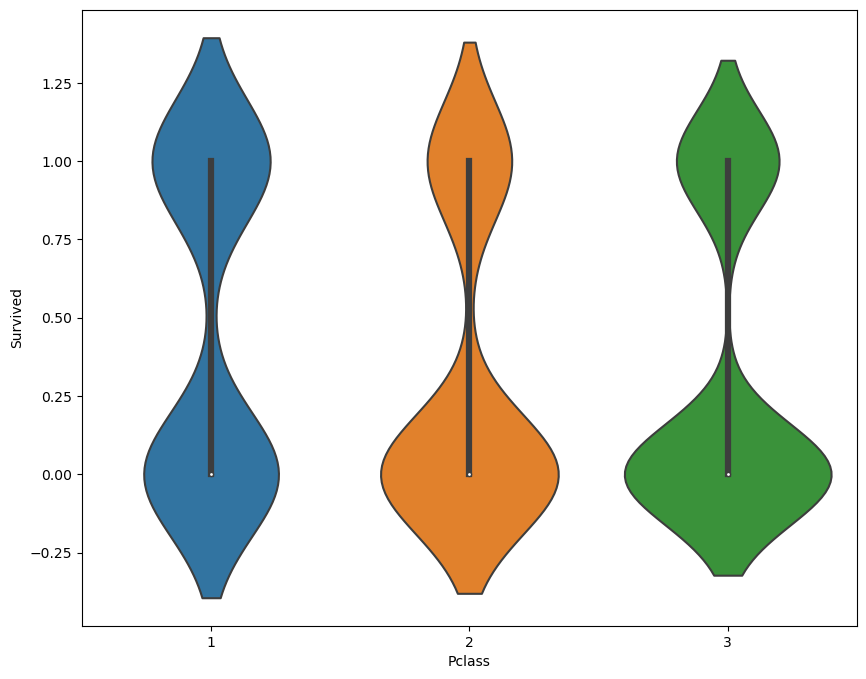

In [92]:
plt.figure(figsize=(10,8))
sns.violinplot(x="Pclass",y="Survived",data=data2)
plt.show()

<Figure size 1000x1500 with 0 Axes>

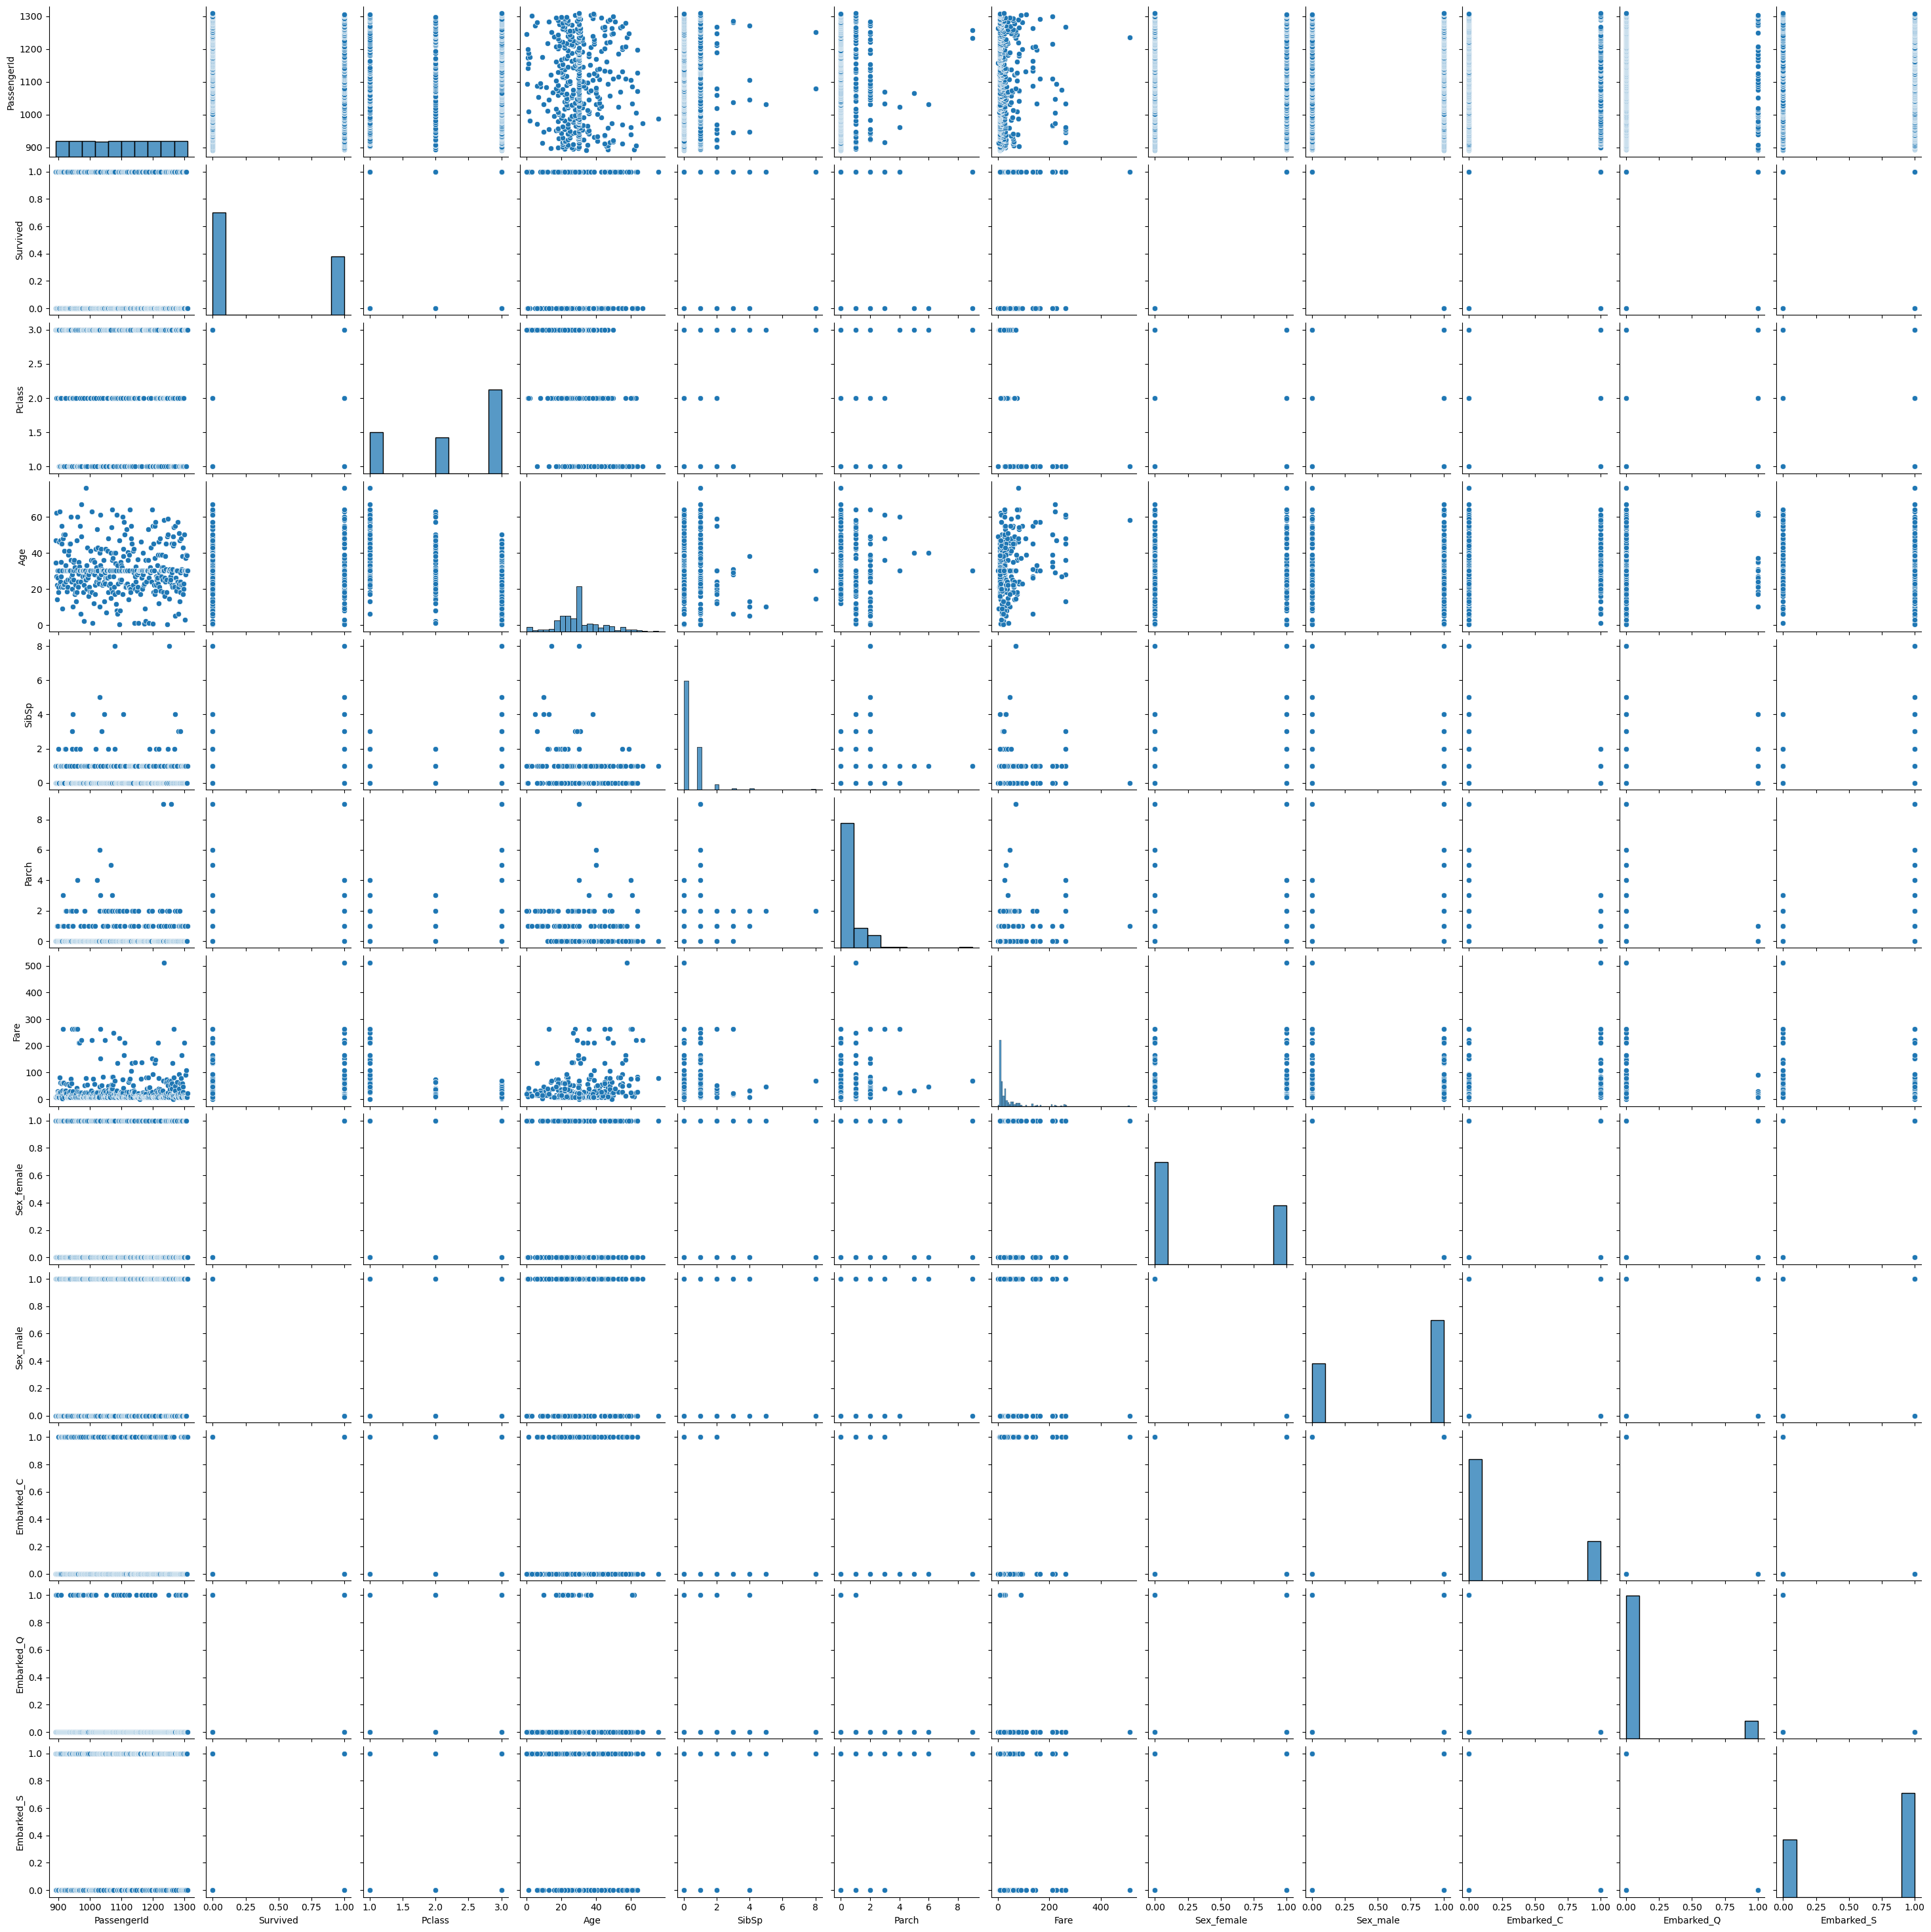

In [94]:
plt.figure(figsize=(10,15))
sns.pairplot(data2)
plt.show()

#3 Pairplot help me to decide which algorith is best for our Model OK!

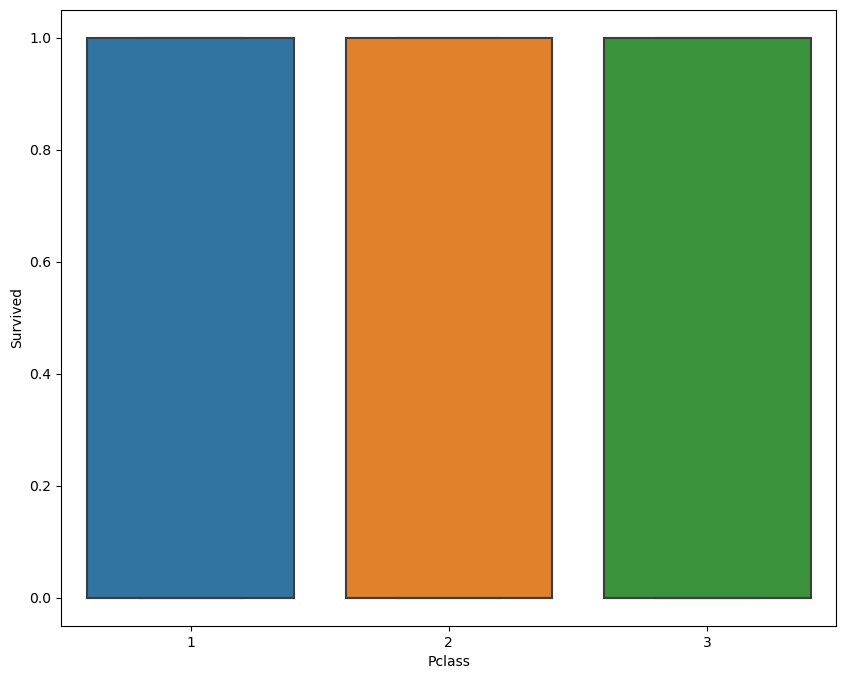

In [97]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Pclass",y="Survived",data=data2)
plt.show()

In [99]:
x = data2.drop(columns=["Survived"])
y = data2[["Survived"]]

In [100]:
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.50000,0,0,7.8292,0.0,1.0,0.0,1.0,0.0
1,893,3,47.00000,1,0,7.0000,1.0,0.0,0.0,0.0,1.0
2,894,2,62.00000,0,0,9.6875,0.0,1.0,0.0,1.0,0.0
3,895,3,27.00000,0,0,8.6625,0.0,1.0,0.0,0.0,1.0
4,896,3,22.00000,1,1,12.2875,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0.0,1.0,0.0,0.0,1.0
414,1306,1,39.00000,0,0,108.9000,1.0,0.0,1.0,0.0,0.0
415,1307,3,38.50000,0,0,7.2500,0.0,1.0,0.0,0.0,1.0
416,1308,3,30.27259,0,0,8.0500,0.0,1.0,0.0,0.0,1.0


In [101]:
y

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [102]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [103]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((333, 11), (84, 11), (333, 1), (84, 1))

In [104]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_df = scaler.fit_transform(x_train)

x_test_df = scaler.transform(x_test)


In [105]:
x_train_df

array([[ 6.65968694e-01, -1.49734761e+00, -4.90142892e-01, ...,
        -5.66946710e-01, -3.42709300e-01,  7.31137615e-01],
       [ 1.52837420e+00, -3.10164863e-01,  2.15103605e+00, ...,
        -5.66946710e-01, -3.42709300e-01,  7.31137615e-01],
       [ 1.91645667e-03,  8.77017888e-01,  1.50142912e-01, ...,
        -5.66946710e-01, -3.42709300e-01,  7.31137615e-01],
       ...,
       [ 5.27983813e-01,  8.77017888e-01,  1.18884283e-02, ...,
        -5.66946710e-01,  2.91792490e+00, -1.36773157e+00],
       [ 1.20066011e+00, -3.10164863e-01,  7.01071864e-02, ...,
        -5.66946710e-01, -3.42709300e-01,  7.31137615e-01],
       [-9.29481486e-01,  8.77017888e-01,  1.18884283e-02, ...,
        -5.66946710e-01,  2.91792490e+00, -1.36773157e+00]])

In [106]:
x_test_df

array([[-0.48965468,  0.87701789,  0.47028581, -0.48310499,  1.69628652,
        -0.44358575,  1.34982736, -1.34982736, -0.56694671, -0.3427093 ,
         0.73113761],
       [ 1.6232388 ,  0.87701789, -0.65021434, -0.48310499, -0.43125928,
        -0.52713724, -0.74083548,  0.74083548, -0.56694671, -0.3427093 ,
         0.73113761],
       [ 1.74397557,  0.87701789, -0.16999999, -0.48310499, -0.43125928,
        -0.52713724,  1.34982736, -1.34982736, -0.56694671, -0.3427093 ,
         0.73113761],
       [-0.99847393, -1.49734761, -0.41010717, -0.48310499, -0.43125928,
        -0.18171476, -0.74083548,  0.74083548,  1.76383421, -0.3427093 ,
        -1.36773157],
       [-1.20545125,  0.87701789, -0.49014289, -0.48310499, -0.43125928,
        -0.52761107,  1.34982736, -1.34982736, -0.56694671,  2.9179249 ,
        -1.36773157],
       [ 1.77847179,  0.87701789,  0.01188843, -0.48310499, -0.43125928,
        -0.5219251 , -0.74083548,  0.74083548, -0.56694671, -0.3427093 ,
         0.731

In [119]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()

In [120]:
reg.fit(x_train_df,y_train)

LogisticRegression()

In [121]:
y_pred = reg.predict(x_test_df)

In [122]:
y_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [123]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print(accuracy_score(y_pred,y_test))

print(classification_report(y_pred,y_test))

print(confusion_matrix(y_pred,y_test))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

[[50  0]
 [ 0 34]]


In [125]:
import pickle 

pickle.dump(reg,open("reg.pkl","wb"))
pickle.dump(scaler,open("scaler.pkl","wb"))